# (Ford GoBike System)
## by (Ahmed Ghandour)

## Preliminary Wrangling

>  Bay Wheels's trip data contains the real-time system data. Each trip is anonymized and includes:

* Trip Duration (seconds)
* Start Time and Date
* End Time and Date
* Start Station ID
* Start Station Name
* Start Station Latitude
* Start Station Longitude
* End Station ID
* End Station Name
* End Station Latitude
* End Station Longitude
* Bike ID
* User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
* Rental Access Method (mobile app or Clipper)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline
base_color = sns.color_palette()[0]

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Read data file and print the first 5 observations
df = pd.read_csv('../data/201907-baywheels-tripdata.csv', parse_dates=True)
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,85457,2019-07-31 09:25:37.3410,2019-08-01 09:09:54.6000,36.0,Folsom St at 3rd St,37.783830,-122.398870,344.0,16th St Depot,37.766349,-122.396292,3491,Customer,No,NaN
1,53831,2019-07-31 18:00:10.2940,2019-08-01 08:57:21.9750,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,133.0,Valencia St at 22nd St,37.755213,-122.420975,2457,Customer,No,NaN
2,33674,2019-07-31 22:52:29.7910,2019-08-01 08:13:44.0100,155.0,Emeryville Public Market,37.840521,-122.293528,155.0,Emeryville Public Market,37.840521,-122.293528,2750,Customer,No,NaN
3,34546,2019-07-31 21:59:34.2580,2019-08-01 07:35:21.0440,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,73.0,Pierce St at Haight St,37.771793,-122.433708,303,Subscriber,No,NaN
4,40244,2019-07-31 20:20:37.5420,2019-08-01 07:31:21.6060,339.0,Jackson St at 11th St,37.800002,-122.266438,233.0,4th Ave at E 12th St (Temporary Location),37.795913,-122.255547,2637,Subscriber,No,NaN


In [3]:
# Print data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258102 entries, 0 to 258101
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             258102 non-null  int64  
 1   start_time               258102 non-null  object 
 2   end_time                 258102 non-null  object 
 3   start_station_id         202215 non-null  float64
 4   start_station_name       202811 non-null  object 
 5   start_station_latitude   258102 non-null  float64
 6   start_station_longitude  258102 non-null  float64
 7   end_station_id           200526 non-null  float64
 8   end_station_name         201076 non-null  object 
 9   end_station_latitude     258102 non-null  float64
 10  end_station_longitude    258102 non-null  float64
 11  bike_id                  258102 non-null  int64  
 12  user_type                258102 non-null  object 
 13  bike_share_for_all_trip  170248 non-null  object 
 14  rent

In [4]:
# Fix datetime and categorical columns data types
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.rental_access_method = df.rental_access_method.astype('category')
df.user_type = df.user_type.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
bike_share_for_all_trip          category
rental_access_method             category
dtype: object

In [5]:
# Number of missing observations
df.isna().mean()

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_id           0.216531
start_station_name         0.214222
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_id             0.223075
end_station_name           0.220944
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
bike_share_for_all_trip    0.340385
rental_access_method       0.659615
dtype: float64

In [6]:
# Check if we have any observation where end time was at the same time or before the start time
(df.end_time <= df.start_time).sum()

0

### What is the structure of your dataset?

> Out data represents bikes rides in July 2019 and it has 258102 observations and 15 columns. It has many missing information.

### What is/are the main feature(s) of interest in your dataset?

> Duration of the rent, start and end time of the rent, start and end stations, the bike id, user type, and the rental method

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> duration_sec, start_time, end_time, start_station_name, end_station_name, bike_id, user_type, bike_share_for_all_trip, and rental_access_method

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

count    258102.000000
mean        841.716097
std        1747.999112
min          60.000000
25%         374.000000
50%         595.000000
75%         932.000000
max       86217.000000
Name: duration_sec, dtype: float64


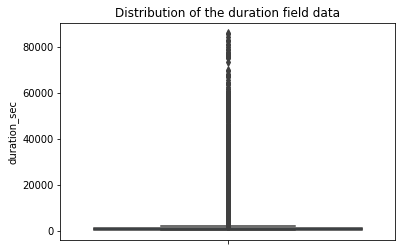

In [7]:
print(df.duration_sec.describe())
sns.boxplot(y=df.duration_sec)
plt.title('Distribution of the duration field data')
plt.show()

We can notice that duration fild suffer from outliers where in some cases people tend to rent the bike for almost a complete day.

In [8]:
# Percentage of outliers in the duration filed:
print('Percentage of outliers in the duration filed = ' + str((df.duration_sec > 2000).mean().round(2)*100) + '%')

Percentage of outliers in the duration filed = 4.0%


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Pct% of ourliers in the duration in seconds field are around 4% so I choosed to removed them from our data.

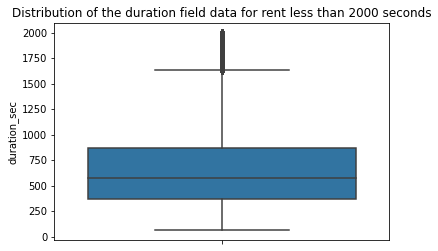

In [9]:
df.query('duration_sec < 2000', inplace=True)
sns.boxplot(y=df.duration_sec)
plt.title('Distribution of the duration field data for rent less than 2000 seconds')
plt.show()

Above shows the data distribution after removing outliers

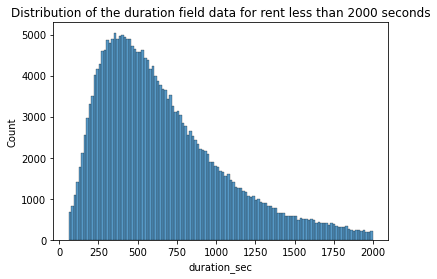

In [10]:
sns.histplot(df.duration_sec)
plt.title('Distribution of the duration field data for rent less than 2000 seconds')
plt.show()

We can notice also that the duration field is right skewed and most of the data were less than 1000 seconds (more than 75% of our data)

### Invistigate our fields

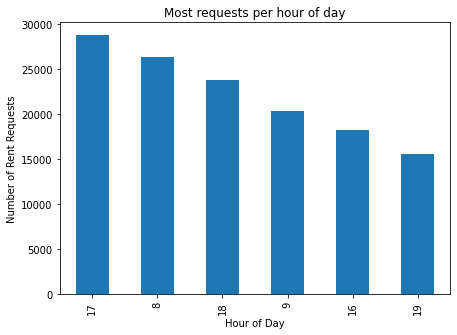

In [11]:
# Most number of rides in each hour of the day
plt.figure(figsize=(7,5))
df.start_time.dt.hour.value_counts()[:6].plot(kind='bar')
plt.title('Most requests per hour of day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rent Requests')
plt.show()

We can notice that the most number of rides are in early morning when people goes to their work (8AM, and 9AM), and afternoon when people are on their way home after work (4PM, 5PM, and 6PM)

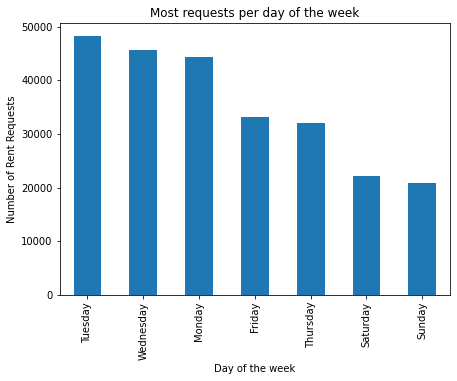

In [12]:
# Most requests per day of the week 
plt.figure(figsize=(7,5))
rpdow = df.start_time.dt.dayofweek.value_counts()
rpdow.index = rpdow.index.map(dict(enumerate(calendar.day_name)))
rpdow.plot(kind='bar')
plt.title('Most requests per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Number of Rent Requests')
plt.show()

We can notice that most requests are within working days specially in the middle of the week. On the other hand we can notice that the least number of requests are during weekend. 

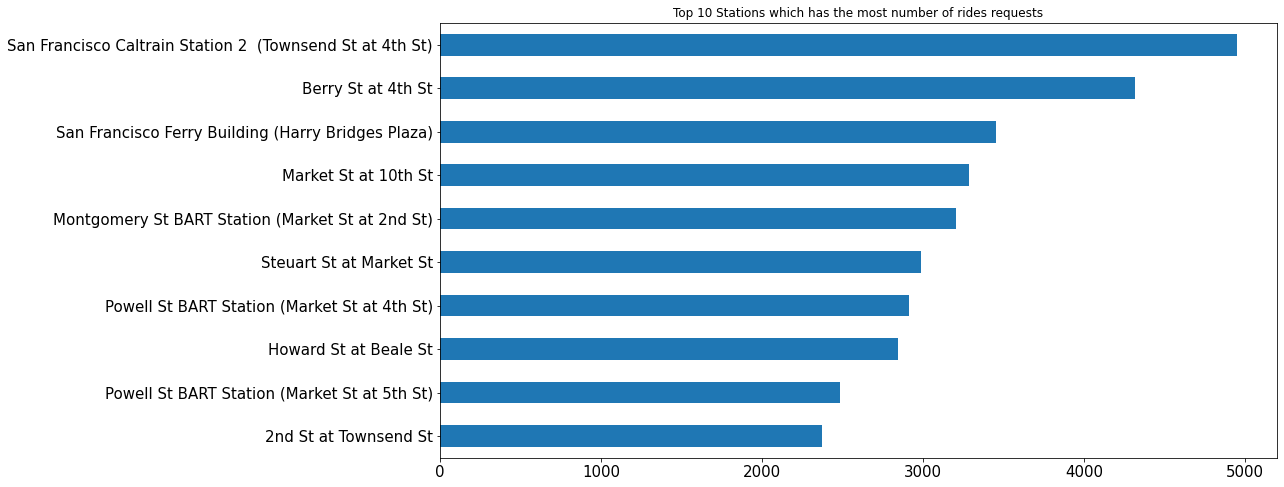

In [13]:
df["start_station_name"].value_counts()[:10].sort_index(ascending=False).sort_values(ascending=True).plot(kind='barh',fontsize=15, figsize=(15,8))
plt.title('Top 10 Stations which has the most number of rides requests')
plt.show()

Above plot shows that most requests came from the above mention stations, thus we may increase number of bikes in these stations for example.

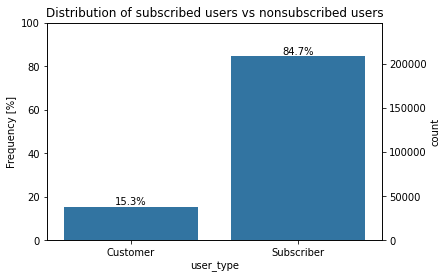

In [14]:
# Distribution of subscribed users vs nonsubscribed users
ax = sns.countplot(data=df, x='user_type', color=base_color)
plt.title('Distribution of subscribed users vs nonsubscribed users')
plt.xlabel('user_type')
ncount = len(df)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
plt.show()

Above count plot shows that most of users are subscribed customers (84.7%)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


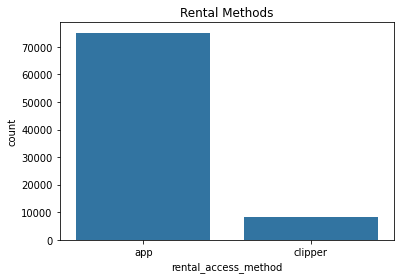

In [15]:
# Rental methods comparison
sns.countplot(df.rental_access_method, color=base_color)
plt.title('Rental Methods')
plt.show()

Above plot shows that most of number of users reted their bikes through their mobile app

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

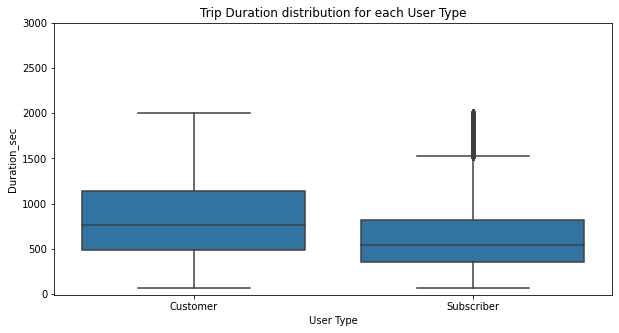

In [16]:
plt.figure(figsize = [10, 5])
sns.boxplot(data = df, x = 'user_type', y = 'duration_sec', color=base_color)
plt.ylim([-10, 3000])
plt.title('Trip Duration distribution for each User Type')
plt.xlabel('User Type')
plt.ylabel('Duration_sec')
plt.show()

Above plot shows that the guest users or nonregistered users tend to rent bike more time than subscribed users.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


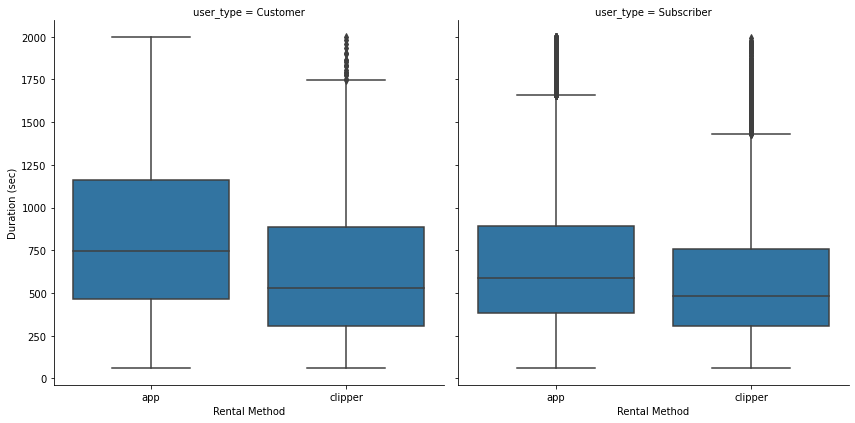

In [17]:
# Rental Method vs Duration by user type
ax = sns.FacetGrid(data=df, col='user_type', size = 6)
ax.map(sns.boxplot, 'rental_access_method', 'duration_sec')
ax.set_xlabels('Rental Method')
ax.set_ylabels('Duration (sec)')
plt.show()

In [18]:
df.rental_access_method.value_counts()

app        75070
clipper     8132
Name: rental_access_method, dtype: int64

In general it lookslike that mobile app users tend to rent bikes for more duration than thos who use clippers. Also looks like that guest or or casual users who use the app tend to rent bikes more time than the subscribed app users.

## Summary of Findings

* Trip Duration (seconds) suffers from outliers where some users rented their bikes for almost one day unlike the majority or users who rented their bikes for less than 15 mins.
* Almost quarter of the station information data are missing. 
* Around 66% of rental method don't exist in our data.
* Users tend to rent bikes in early morning and afternoon (almost at work times).
* Users tend to rent their bikes during working days, and rentals are less during weekends.
* SanFrancissco is the most popular station.
* Most number of users are subscribed users.
* Most number of users are app users.
* Guest users rent bike longer than subscribed users.
* App users rent bikes longer than clipper users, and app guest usres rent longer than app clipper users.


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!